# Linear Regression


> _"Baseball statistics are like a girl in a bikini. They show a lot, but not everything."_   
    
> <a href="http://www.baseball-reference.com/players/h/harrato01.shtml" target="_blank">- Toby Harrah, former MLB baseball player</a>


<div style="align: center; text-align:center;">
    <img src=img/scorecard.jpg height="300px" width="500px" />
</div>

---

## Overview

The MLB has existed since 1869. Over the ~150 years since then, MLB general managers and statisticians have developed a vast assortment of metrics in an attempt to build baseball rosters with higher chances of succeeding.

In this notebook, I demonstrate usage of both univariate and multivariate linear regression (in Python) as a means for predicting specific outcomes -- specifically, __I examine how we can use various baseball metrics to predict the number of wins Major League Baseball (MLB) teams attain over the course of a 162-game season__.   

_As a disclaimer, this notebook is intended to demonstrate principles of linear regression in a baseball setting; it is not intended as a rigorous analysis of the ideal predictors to use in constructing a successful baseball team :)_

---

## Method

Linear regression is a common technique used for predicting continuous variables. _Univariate_ linear regression refers to regression models with only one predictor variable, whereas _multivariate_ linear regression refers to regression models with several predictor variables. In this analysis, I will compare several regression models in an attempt to evaluate the relative impact that various baseball metrics have on the number of wins teams attain per season. 

### Data

Data for this analysis include data from the <a href="http://www.seanlahman.com/baseball-archive/statistics/" target="_blank">Lahman database</a> and <a href="http://www.fangraphs.com/" target="_blank">fangraphs.com</a>, and were cleaned and prepared in another notebook; please see [this notebook](INSERT LINK TO NOTEBOOK) for more information on how the variables listed below were collected.

In the dataset, each row represents a single team over one season of play. There are 30 MLB teams represented in the dataset ranging 100 years from 1916 - 2015. See below for descriptions of the variables used in this analysis.

--- 
| __Regression Model__        | __Predictor(s)__            | __Outcome__ |
| :-------------: |:-------------:| :-----:|
| _Univariate1_      | `AVG` | `wins` |
| _Multivariate_      | `AVG`, `BB%`, `HR`, `SO%`      |   `wins` |
| _Univariate2_ | `WAR`      |    `wins` |

--- 
| __Metric__ | __Definition__ | 
| :----: | :---- |
| `AVG` | batting average; the average number of base hits a team achieved per at bat in a given season (e.g., .300 AVG = 3 hits every 10 at bats) 
| `BB%` | the percentage of times a team walked per plate appearance in a given season  |
| `HR` | the number of home runs a team attained in a given season |  
| `SO%` | the percentage of times a team struck out per plate appearance in a given season
| `WAR` | team total "wins above replacement", a popular <a href="http://sabr.org/sabermetrics" target="_blank">_sabermetric_</a> which represents a player's overall "value" with a single number (<a href="http://www.fangraphs.com/library/misc/war/" target="_blank">see formula here</a>) |  
| `wins` | the number of wins a team achieved in a single season (MLB has played 162 game seasons since 1962) | 

--- 

## Analysis & Code

#### Library & data import

I used the <a href="http://scikit-learn.org/" target="_blank">`scikit-learn`</a> library for my regression modeling. Import this and other data analysis / visualization libraries first.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# allows me to view plots in jupyter notebook
%matplotlib inline    

In [2]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Import and examine the data, which was prepared in another [Jupyter notebook](INSERT LINK HERE).

In [3]:
master = pd.read_csv('data/master_baseball.csv')

In [4]:
master.describe()

//anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Year,off_G,off_PA,off_HR,off_R,off_RBI,off_SB,off_BB%,off_K%,off_ISO,...,def_ARM,def_DPR,def_RngR,def_ErrR,def_UZR,def_UZR/150,def_Def,G,W,L
count,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,2166.000000,...,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,2166.000000,2166.000000,2166.000000
mean,1972.686981,1963.427054,6044.280240,123.977378,699.712373,654.054940,90.286242,0.085144,0.135631,0.130229,...,-0.002381,0.015476,0.001905,0.009524,0.021905,0.034286,-0.061429,157.506925,78.542475,78.542475
std,28.583509,265.951950,363.811507,50.209298,105.352933,104.178649,42.212902,0.011955,0.039281,0.026783,...,7.822115,3.871279,29.175432,8.060150,32.377808,5.011620,33.937258,9.075648,13.191599,13.113496
min,1916.000000,1089.000000,3886.000000,4.000000,329.000000,303.000000,13.000000,0.046000,0.053000,0.059000,...,-22.900000,-9.100000,-136.000000,-23.200000,-141.700000,-19.200000,-147.700000,103.000000,36.000000,40.000000
25%,1949.000000,1753.000000,5972.000000,92.000000,634.000000,591.250000,59.000000,0.077000,0.102000,0.111000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155.000000,70.000000,69.000000
50%,1977.000000,1949.500000,6119.000000,125.000000,699.000000,655.000000,84.000000,0.084000,0.141000,0.130000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162.000000,79.000000,78.000000
75%,1997.000000,2202.750000,6224.000000,159.000000,765.000000,718.000000,116.000000,0.093000,0.164000,0.149000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162.000000,88.000000,88.000000
max,2015.000000,2528.000000,6554.000000,264.000000,1067.000000,997.000000,341.000000,0.134000,0.255000,0.206000,...,27.000000,10.900000,92.300000,21.000000,86.000000,14.300000,96.900000,165.000000,116.000000,120.000000


In [5]:
# first_year = ###
# last_year = ###
# master = master[(master['Year'] >= first_year) & (master['Year'] <= last_year)]
# master.describe()

#### Prepare data

Next, I need to prepare my data by separating the predictors and outcome variables for the regression models. I will also rename variables to match the names used in the Method section above.

In [6]:
avg = master['off_AVG']    # univariate1 predictor
preds = master[['off_AVG','off_BB%','off_HR','off_K%']]    # multivariate predictors
war = master['off_WAR']    # univariate2 predictor
wins = master['W']    # outcome variable

In [7]:
preds.columns = ['AVG','BB%','HR','SO%']    # rename variables to match Method
preds.columns

Index([u'AVG', u'BB%', u'HR', u'SO%'], dtype='object')

#### Univariate: AVG

First, I will examine batting average as a predictor of wins alone using a univariate regression model. Next, I use tuple unpacking along with `train_test_split` from `scikit-learn` to create a _training_ dataset using 30% of the available data. I will train my linear model on this data before applying the model to the _test_ dataset, the remaining 70% of the data.

In [8]:
# use 30% of data for test set, set random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(avg, wins, test_size=0.3, random_state=101)

Now that I have separate test and training datasets, I can train a linear model on the test data using `LinearRegression()` and `.fit`.

In [9]:
lm = LinearRegression()

# use reshape(-1,1) to format data in way acceptable for lm.fit
lm.fit(X_train.reshape(-1,1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Next, I can create an array of predictions for the outcome variable `wins` in the test dataset based on the `lm` regression model I just created. If my regression model is a perfect fit to the data, there will be no difference between my predicted `wins` values and the actual `wins` values.

In [10]:
# predictions = lm.predict(X_test)
predictions = lm.predict(X_test.reshape(-1,1))

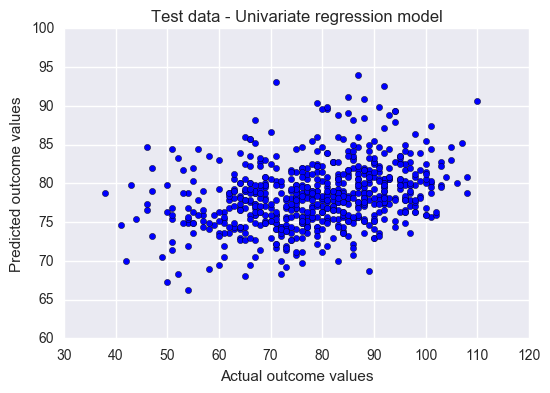

In [11]:
# view scatter plot of predictions vs. actual values
plt.scatter(y_test,predictions)
plt.title('Test data - Univariate regression model')
plt.xlabel('Actual outcome values')
plt.ylabel('Predicted outcome values')

In [12]:
# view model metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R^2:', np.sqrt(metrics.r2_score(y_test, predictions)))

('MAE:', 10.270734840214262)
('MSE:', 161.34400410286122)
('RMSE:', 12.702125967839448)
('R^2:', 0.31377369976282116)


In [13]:
# view coefficients table
# interpretation of table: 1-unit increase in variable in column 1 corresponds with 
coefficients = pd.DataFrame(lm.coef_,index=['AVG'])
coefficients.columns = ['Coefficient']
coefficients.sort('Coefficient',ascending=False)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Coefficient
AVG,271.885121


#### Multivariate: AVG, HR, SO, BB

--- 

In [16]:
# set params for model, use 30% of data for test set
X_train, X_test, y_train, y_test = train_test_split(preds, wins, test_size=0.3, random_state=101)

In [17]:
preds.head()

,AVG,BB%,HR,SO%
0,0.307,0.103,158,0.098
1,0.280,0.104,141,0.138
2,0.297,0.116,155,0.086
3,0.287,0.114,166,0.089
4,0.265,0.100,175,0.127


In [18]:
# train model
lm = LinearRegression()
# lm.fit(X_train,y_train)
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
# predictions = lm.predict(X_test)
predictions = lm.predict(X_test)

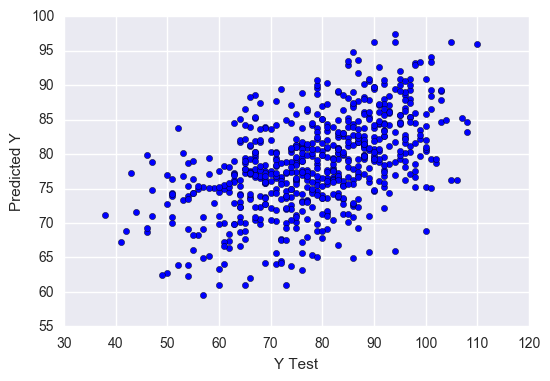

In [20]:
# view scatter plot of predictions vs. actual values
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [22]:
# view model metrics

# metrics = 

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R^2:', np.sqrt(metrics.r2_score(y_test, predictions)))

('MAE:', 9.1740456920554401)
('MSE:', 129.30531664774512)
('RMSE:', 11.371249564042868)
('R^2:', 0.52676117674482947)


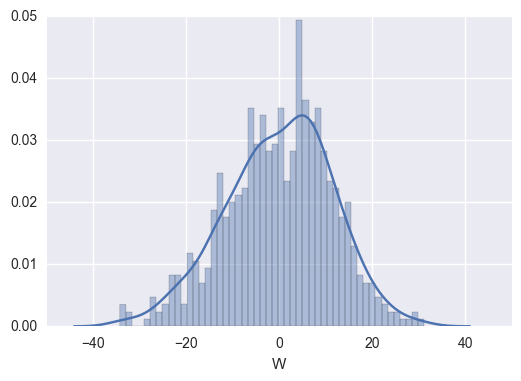

In [23]:
# plot residuals, should approximate normal distribution
sns.distplot((y_test-predictions),bins=50)

In [24]:
# view coefficients table
# interpretation of table: 1-unit increase in variable in column 1 corresponds with 
coefficients = pd.DataFrame(lm.coef_,preds.columns)
coefficients.columns = ['Coefficient']
coefficients.sort('Coefficient',ascending=False)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Coefficient
AVG,220.396304
BB%,190.243574
HR,0.092984
SO%,-27.091992


# To-do

[sklearn.feature_selection.RFE: Feature ranking with recursive feature elimination](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)  
[Feature Selection in Python with Scikit-Learn](http://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/)  
[OLS with statsmodels](http://statsmodels.sourceforge.net/devel/examples/generated/example_ols.html)  
[The classes in the sklearn.feature_selection module can be used for feature selection/dimensionality reduction on sample sets, either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets.](http://scikit-learn.org/stable/modules/feature_selection.html)  
[scikitlearn generalized linear model](http://scikit-learn.org/stable/modules/linear_model.html)  
[sklearn.feature_selection.f_regression(X, y, center=True)[source]](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html)  
[Stack Overflow: stepwise regression in python](http://stackoverflow.com/questions/15433372/stepwise-regression-in-python)  


--- 
## Appendix

### Links 
<a href="https://en.wikipedia.org/wiki/Glossary_of_baseball_(0%E2%80%939)#5-tool_player" target="_blank">5 tool baseball player: wikipedia.com</a>

<a href="http://www.performancebaseball.net/html/5tools.html" target="_blank">5 tool baseball player: performancebaseball.net</a>

<a href="http://fivethirtyeight.com/features/the-toolsiest-player-of-them-all/" target="_blank">'Toolsiest player of them all': 538.com</a>

<a href="http://www.baseball-reference.com/about/war_explained.shtml" target="_blank">Baseball Reference WAR</a>

<a href="http://www.fangraphs.com/library/misc/war/" target="_blank">Fangraphs WAR</a>

<a href="https://en.wikipedia.org/wiki/Wins_Above_Replacement" target="_blank">Wikipedia WAR</a>

<a href="http://www.espn.com/blog/sweetspot/post/_/id/27050/what-we-talk-about-when-we-talk-about-war" target="_blank">ESPN WAR</a>


<div style="align: center; text-align:center;">
    <img src=img/kengriffey.png height="400px" width="400px" />
    <div class="caption" >_Ken Griffey Jr: The Ultimate 5-Tool Player_</div>
</div>

